In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import userdata
import json
import pytz
import datetime as dt

import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf

import xgboost
import statsmodels.api as sm


In [ ]:
# lat, lon = 35.879768, -78.785551

# # API_KEY = userdata.get("ACCU_KEY")
# # missing_hours = []
# # start=1759273200
# # # print(API_KEY)
# # for i in range(7):
# #   time = start + (i*3600)
# #   url=f"https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={time}&appid={API_KEY}&units=imperial"
# #   response=requests.get(url)
# #   missing_hours.append(json.loads(response.content.decode('utf-8'))['data'][0])
# missdf = pd.DataFrame(missing_hours)

In [ ]:
# missdf['weather'][0][0]

In [ ]:
# df = pd.read_csv("/content/revisedweather.csv")

# df = pd.concat([df, missdf],ignore_index=True)

# # fill na columns with 0
# na_cols = ["rain_1h","rain_3h","snow_1h","snow_3h"]
# for col in na_cols:
#   df[col].fillna(0, inplace=True)

# # datetime ops
# df['datetime_utc'] = pd.to_datetime(df['dt'], unit='s', utc=True)
# df['datetime_est'] = df['datetime_utc'].dt.tz_convert('US/Eastern')
# df['dayYear'] = df['datetime_est'].dt.day_of_year
# df['hourDay'] = df['datetime_est'].dt.hour

# df.drop(columns=['lat','lon', 'datetime_utc', "timezone",'sea_level', "grnd_level", "weather_id", "weather_main","weather_description", "weather_icon","city_name","visibility","wind_gust","wind_deg", "sunrise","sunset","clouds", "clouds_all","weather","rain"], inplace=True)
# df["y"]= df["temp"].shift(-1)
# df = df[:-2]

# df.drop_duplicates(subset=['dt'], inplace=True)
# # df[-10:]
# df.shape
# # df.to_csv("/content/drive/MyDrive/revisedweather.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/RDUweather.csv'

In [ ]:
df = pd.read_csv("/content/revisedweather.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409804 entries, 0 to 409803
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    409804 non-null  int64  
 1   dt            409804 non-null  int64  
 2   dt_iso        409800 non-null  object 
 3   temp          409804 non-null  float64
 4   dew_point     409804 non-null  float64
 5   feels_like    409804 non-null  float64
 6   temp_min      409800 non-null  float64
 7   temp_max      409800 non-null  float64
 8   pressure      409804 non-null  int64  
 9   humidity      409804 non-null  int64  
 10  wind_speed    409804 non-null  float64
 11  rain_1h       409804 non-null  float64
 12  rain_3h       409804 non-null  float64
 13  snow_1h       409804 non-null  float64
 14  snow_3h       409804 non-null  float64
 15  datetime_est  409804 non-null  object 
 16  dayYear       409804 non-null  int64  
 17  hourDay       409804 non-null  int64  
 18  y   

In [ ]:
df.describe()

,Unnamed: 0,dt,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,dayYear,hourDay,y
count,409804.000000,4.098040e+05,409804.000000,409804.000000,409804.000000,409800.000000,409800.000000,409804.000000,409804.000000,409804.000000,409804.000000,409804.000000,409804.000000,409804.000000,409804.000000,409804.000000,409804.000000
mean,220855.970408,1.021642e+09,60.578251,49.956747,59.805347,59.529761,61.612987,1017.851204,70.476364,6.228225,0.142901,0.024124,0.005362,0.000870,182.419808,11.500027,60.572309
std,128026.444989,4.258813e+08,16.715865,17.497137,19.284611,16.689317,16.743904,6.681293,19.780778,3.941275,0.776218,0.575497,0.101042,0.074289,105.232739,6.922389,16.716979
min,0.000000,2.839968e+08,-4.540000,-23.370000,-17.140000,-6.020000,-3.690000,966.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-4.540000
25%,108858.750000,6.528195e+08,47.640000,35.920000,45.100000,46.650000,48.720000,1014.000000,55.000000,3.510000,0.000000,0.000000,0.000000,0.000000,91.000000,6.000000,47.640000
50%,222311.500000,1.021642e+09,62.510000,53.020000,61.950000,61.470000,63.540000,1018.000000,73.000000,5.820000,0.000000,0.000000,0.000000,0.000000,182.000000,12.000000,62.490000
75%,331970.250000,1.390465e+09,73.600000,65.250000,74.370000,72.680000,74.620000,1022.000000,88.000000,8.050000,0.000000,0.000000,0.000000,0.000000,273.000000,18.000000,73.600000
max,439809.000000,1.759288e+09,105.130000,83.320000,112.980000,103.960000,106.120000,1049.000000,100.000000,51.900000,53.300000,79.200000,7.900000,16.500000,366.000000,23.000000,105.130000


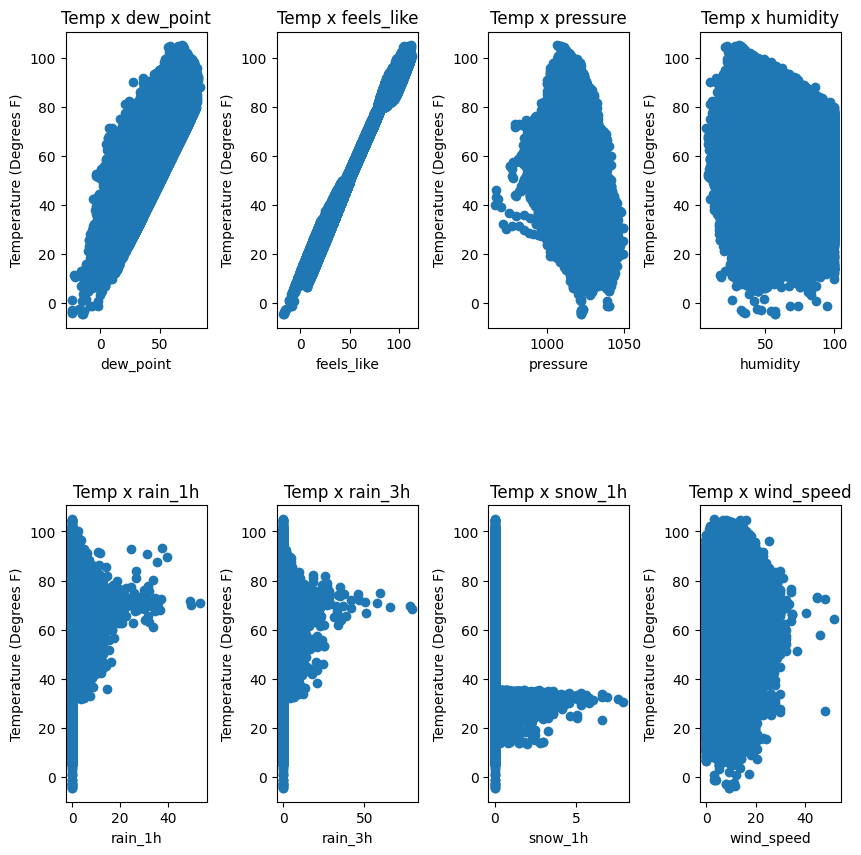

In [ ]:
rows, cols = 2, 4
fig,axs = plt.subplots(rows,cols, figsize=(10,10))
columns = ["dew_point", "feels_like", "pressure", "humidity", "rain_1h","rain_3h","snow_1h", "wind_speed"]
for i in range(len(columns)):
  r, c = i//cols, i%cols
  # print(r,c)
  axs[r][c].scatter(df[columns[i]], df['temp'])
  axs[r][c].set_title(f"Temp x {columns[i]}")
  axs[r][c].set_xlabel(columns[i])
  axs[r][c].set_ylabel("Temperature (Degrees F)")
plt.subplots_adjust(wspace=0.5, hspace=0.6)
plt.show()

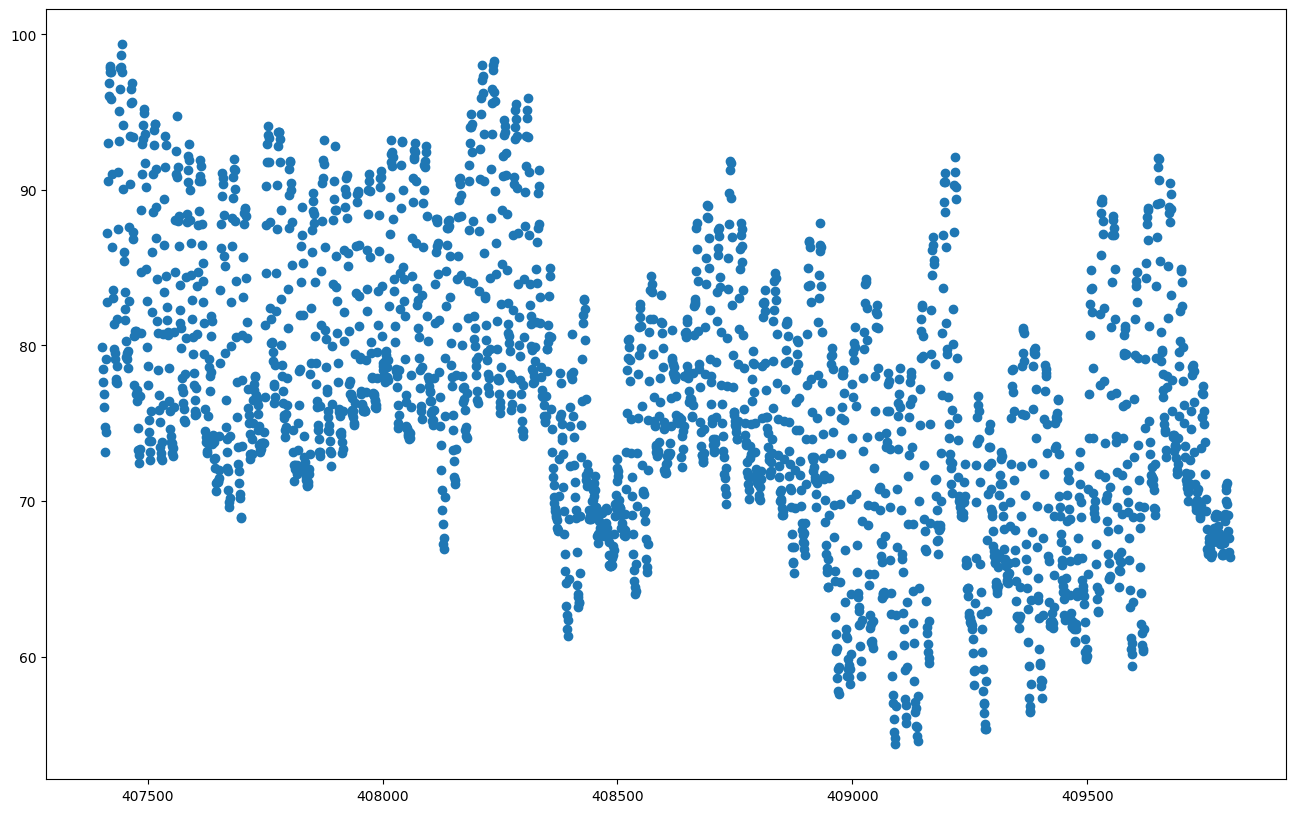

In [ ]:
# years = np.arange(min(df['datetime_est'].dt.), max(df['datetime_est'].dt.year) + 1, 5).astype(int)
plt.figure(figsize = (16,10))
plt.scatter(df.index[-100*24:], df['temp'].iloc[-100*24:])
# plt.xticks(years) # Show all integer values

plt.show()


Linear Model predicting one hour ahead

Mean MSE: 4.983
Mean RMSE: 2.232
Mean R2: 0.9180531245775453985658
Baseline prev temp: 4.286


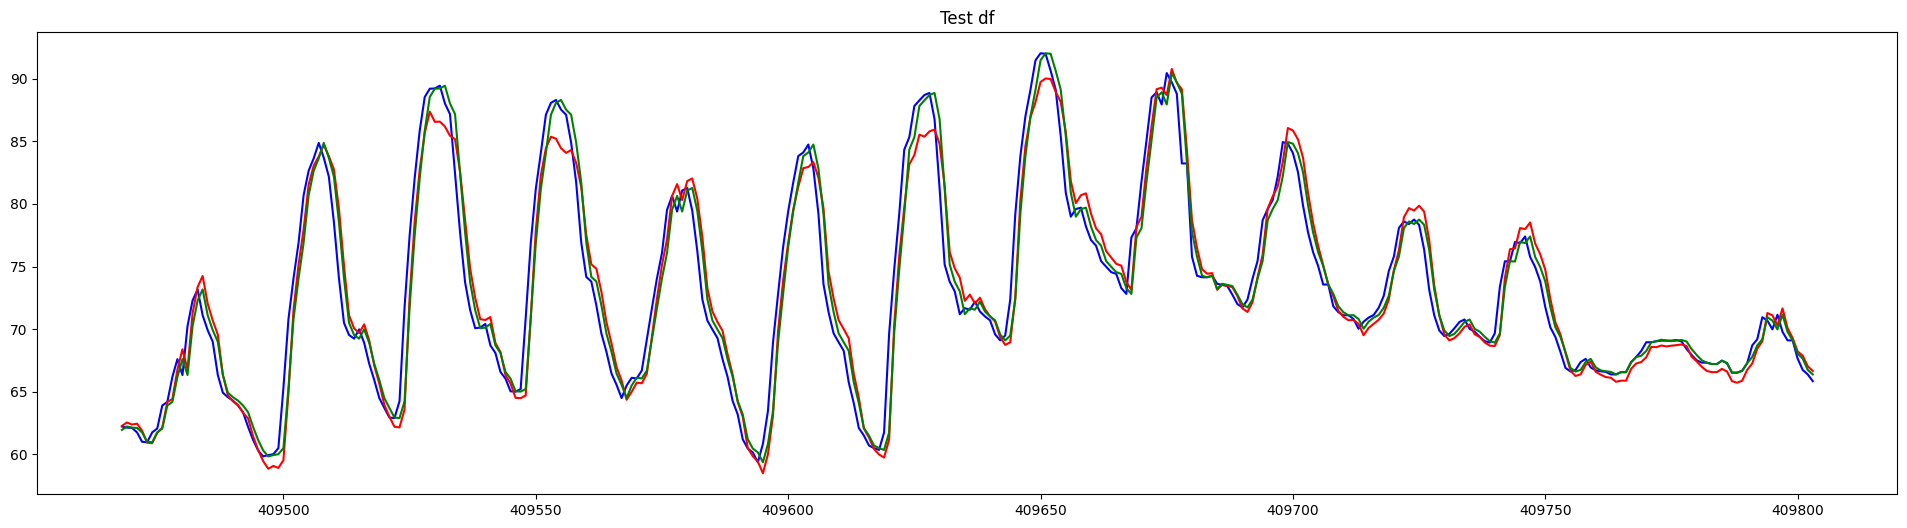

In [ ]:
# set aside testdf
traindf = df.iloc[:-14*24]
testdf = df.iloc[-14*24:]
# print(testdf[-10:])
# print(traindf)
# X and y columns in df
# ['dew_point',  'pressure', 'humidity', 'rain_1h', 'snow_1h', 'dayYear', 'hourDay']
xcols = ['dew_point', 'humidity']


Xtrain_full = traindf[xcols]
ytrain_full = traindf['y']
xtest = testdf[xcols]
ytest = testdf['y']

# print(type(Xtrain_full), type(ytrain_full), type(xtest), type(ytest))
# tscv= TimeSeriesSplit(gap=0, max_train_size=100*24, n_splits=20, test_size=14*24)
# mse_scores = []
# rmse_scores = []
# r2_scores = []

model = LinearRegression()
Xtrain = Xtrain_full
ytrain = ytrain_full

model.fit(Xtrain, ytrain)
y_pred = model.predict(xtest)

mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f"Mean MSE: {mse:.3f}")
print(f"Mean RMSE: {rmse:.3f}")
print(f"Mean R2: {np.mean(r2):.23}")
mse2 = mean_squared_error(ytest, testdf['temp'])
print(f"Baseline prev temp: {mse2:.3f}")

plt.figure(figsize=(24, 6))
plt.plot(ytest, 'b')
plt.plot(ytest.index, y_pred, 'r')
plt.plot(ytest.index, testdf['temp'], 'g')
plt.title("Test df")
plt.show();

In [ ]:
sdf = df['temp'][-100*24:]
sdf.index = df['datetime_est'][-50*24:]
# sdf
decomposition = sm.tsa.seasonal_decompose(sdf, model='additive')
fig = decomposition.plot()
plot_acf(sdf, lags=50)
plt.show()

# Feature engineering
## Lag
for lag in [1, 2, 3, 7, 14, 30]:
    df[f'temp_lag_{lag}'] = df['temperature'].shift(lag)

## Rolling avgs
df['temp_roll_3'] = df['temperature'].rolling(3).mean()
df['temp_roll_7'] = df['temperature'].rolling(7).mean()

## Frequency day of year
df['dayofyear'] = df.index.dayofyear
df['sin_day'] = np.sin(2 * np.pi * df['dayofyear']/365)
df['cos_day'] = np.cos(2 * np.pi * df['dayofyear']/365)

In [ ]:
wdf = pd.read_csv("/content/drive/MyDrive/revisedweather.csv")
testdf = wdf.iloc[-24*15:]
testdf
# wdf=wdf.iloc[:-24*15]
# wdf


,Unnamed: 0,dt,dt_iso,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,datetime_est,dayYear,hourDay,y
409444,439429,1757995200,2025-09-16 04:00:00 +0000 UTC,67.35,59.54,67.35,65.32,68.70,1020,76,4.61,0.00,0.0,0.0,0.0,2025-09-16 00:00:00-04:00,259,0,66.22
409445,439430,1757998800,2025-09-16 05:00:00 +0000 UTC,66.22,59.16,66.20,64.81,67.69,1020,78,5.75,0.00,0.0,0.0,0.0,2025-09-16 01:00:00-04:00,259,1,65.89
409446,439431,1758002400,2025-09-16 06:00:00 +0000 UTC,65.89,59.20,65.89,64.31,67.62,1020,79,4.61,0.61,0.0,0.0,0.0,2025-09-16 02:00:00-04:00,259,2,64.89
409447,439432,1758006000,2025-09-16 07:00:00 +0000 UTC,64.89,58.93,64.89,63.72,66.67,1020,81,4.61,0.00,0.0,0.0,0.0,2025-09-16 03:00:00-04:00,259,3,64.51
409448,439433,1758009600,2025-09-16 08:00:00 +0000 UTC,64.51,58.89,64.51,63.82,65.68,1019,82,5.75,0.00,0.0,0.0,0.0,2025-09-16 04:00:00-04:00,259,4,64.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409799,439804,1759273200,2025-09-30 23:00:00 +0000 UTC,69.10,65.39,69.84,67.44,69.80,1014,88,4.61,0.00,0.0,0.0,0.0,2025-09-30 19:00:00-04:00,273,19,69.10
409800,439806,1759276800,NaN,68.05,64.36,68.70,NaN,NaN,1014,88,4.00,0.00,0.0,0.0,0.0,2025-09-30 20:00:00-04:00,273,20,67.64
409801,439807,1759280400,NaN,67.64,63.63,68.20,NaN,NaN,1014,87,8.05,0.00,0.0,0.0,0.0,2025-09-30 21:00:00-04:00,273,21,66.74
409802,439808,1759284000,NaN,66.74,62.42,67.15,NaN,NaN,1014,86,9.22,0.00,0.0,0.0,0.0,2025-09-30 22:00:00-04:00,273,22,66.38


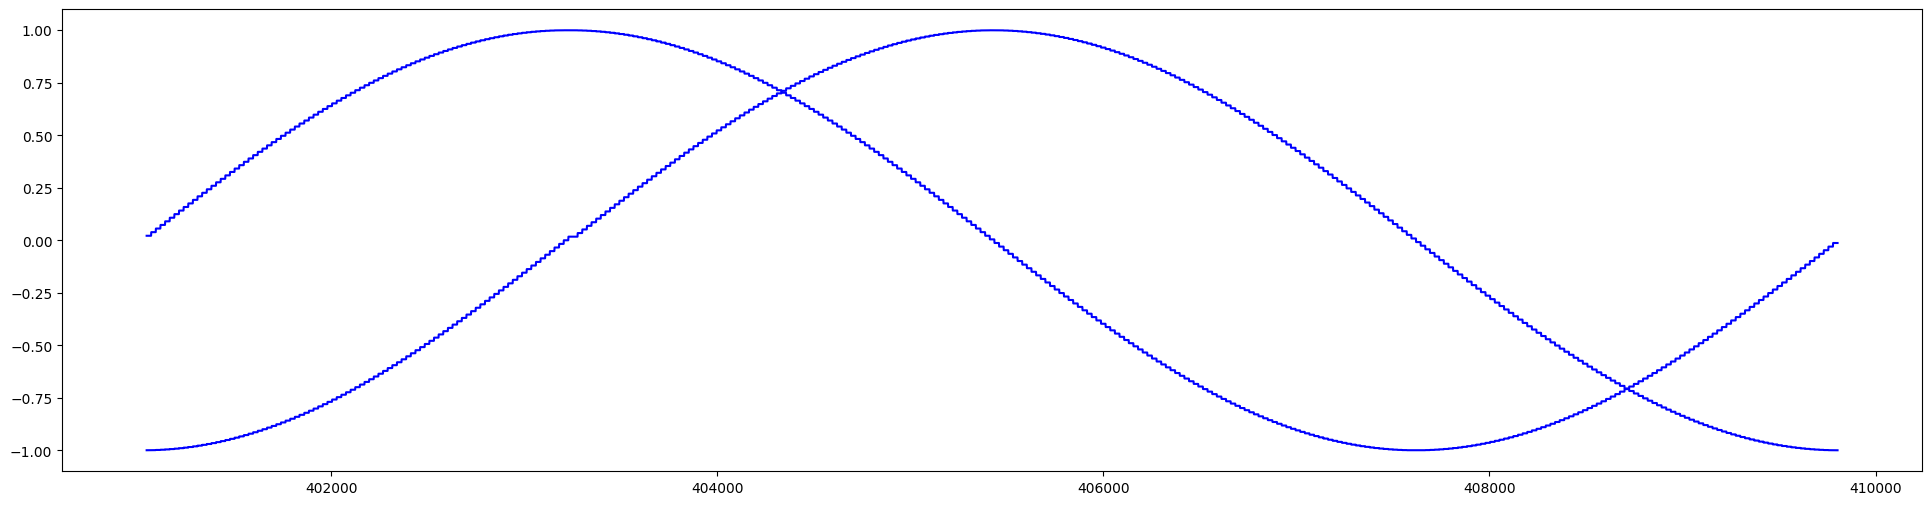

In [ ]:
df = pd.DataFrame()
## Lag
for lag in [1, 2, 3, 7, 14, 30]:
  df[f'temp_day_lag_{lag}'] = wdf['temp'].shift(lag * 24)

## Rolling avgs
df['temp_roll_3'] = wdf['temp'].rolling(3).mean()
df['temp_roll_7'] = wdf['temp'].rolling(7).mean()

## Frequency day of year
df['day']= wdf['dayYear']
df['sin_day'] = np.sin(2 * np.pi * wdf['dayYear']/365)
df['cos_day'] = np.cos(2 * np.pi * wdf['dayYear']/365)


plt.figure(figsize=(24, 6))
plt.plot(df[["sin_day"]][-365*24:], 'b')
plt.plot(df[["cos_day"]][-365*24:], 'b')



In [ ]:
future_preds = []
last_known = df.iloc[-7:].copy()  # last 7 days of data

for i in range(14):
    X_future = last_known[[f'lag_{lag}' for lag in range(1, 8)]].iloc[-1:].values
    next_pred = model.predict(X_future)[0]
    future_preds.append(next_pred)

    # Shift the lags forward and append the new prediction
    new_row = pd.Series({f'lag_{i}': last_known[f'lag_{i}'].iloc[-1] for i in range(1, 8)})
    new_row['lag_1'] = next_pred
    for lag in range(2, 8):
        new_row[f'lag_{lag}'] = last_known[f'lag_{lag-1}'].iloc[-1]
    last_known = pd.concat([last_known, pd.DataFrame([new_row])])